Proyecto de Fuga de empleados


In [130]:
#Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os 

In [131]:
#Directorio de trabajo
os.chdir('F:/Carpeta Drive/Python/Base')
hr=pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [132]:
#Lista de Variables
hr.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [133]:
#seleccionando las variables
hr=hr.rename(columns = {'Age':'Edad'})
hr=hr.rename(columns = {'Attrition':'Churn'})
hr=hr.rename(columns = {'Gender':'Genero'})
hr=hr.rename(columns = {'BusinessTravel':'Viajes_negocios'})
hr=hr.rename(columns = {'DistanceFromHome':'Distancia_casa'})
hr=hr.rename(columns = {'Department':'Area'})
hr=hr.rename(columns = {'JobRole':'Cargo'})
hr=hr.rename(columns = {'MaritalStatus':'Estado_civil'})
hr=hr.rename(columns = {'MonthlyIncome':'Ingreso_mensual'})
hr=hr.rename(columns = {'JobSatisfaction':'Satisfaccion'})



colnames=['Edad','Genero','Viajes_negocios','Distancia_casa','Area','Cargo','Estado_civil',
         'Ingreso_mensual','Satisfaccion','Churn']
hr=hr[colnames]

In [134]:
#Inspeccionando la base
hr.head(5)

,Edad,Genero,Viajes_negocios,Distancia_casa,Area,Cargo,Estado_civil,Ingreso_mensual,Satisfaccion,Churn
0,41,Female,Travel_Rarely,1,Sales,Sales Executive,Single,5993,4,Yes
1,49,Male,Travel_Frequently,8,Research & Development,Research Scientist,Married,5130,2,No
2,37,Male,Travel_Rarely,2,Research & Development,Laboratory Technician,Single,2090,3,Yes
3,33,Female,Travel_Frequently,3,Research & Development,Research Scientist,Married,2909,3,No
4,27,Male,Travel_Rarely,2,Research & Development,Laboratory Technician,Married,3468,2,No


In [135]:
hr.dtypes

Edad                int64
Genero             object
Viajes_negocios    object
Distancia_casa      int64
Area               object
Cargo              object
Estado_civil       object
Ingreso_mensual     int64
Satisfaccion        int64
Churn              object
dtype: object

In [136]:
hr['Churn']=np.where(hr['Churn'] =='Yes', 1,0)

In [137]:
hr.isnull().any()

Edad               False
Genero             False
Viajes_negocios    False
Distancia_casa     False
Area               False
Cargo              False
Estado_civil       False
Ingreso_mensual    False
Satisfaccion       False
Churn              False
dtype: bool

In [138]:
hr.shape

(1470, 10)

In [139]:
hr['Area'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [140]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
Edad               1470 non-null int64
Genero             1470 non-null object
Viajes_negocios    1470 non-null object
Distancia_casa     1470 non-null int64
Area               1470 non-null object
Cargo              1470 non-null object
Estado_civil       1470 non-null object
Ingreso_mensual    1470 non-null int64
Satisfaccion       1470 non-null int64
Churn              1470 non-null int32
dtypes: int32(1), int64(4), object(5)
memory usage: 109.2+ KB


In [141]:
hr['Churn'].value_counts()

0    1233
1     237
Name: Churn, dtype: int64

In [142]:
hr.groupby('Churn').mean()

,Edad,Distancia_casa,Ingreso_mensual,Satisfaccion
Churn,,,,
0,37.561233,8.915653,6832.739659,2.778589
1,33.607595,10.632911,4787.092827,2.468354


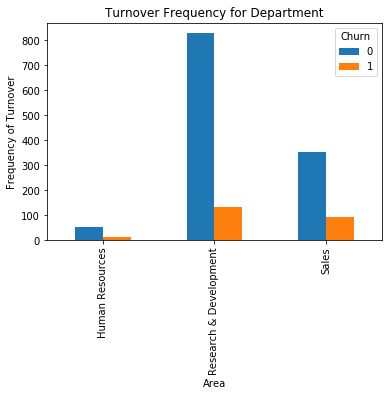

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.Area,hr.Churn).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Area')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

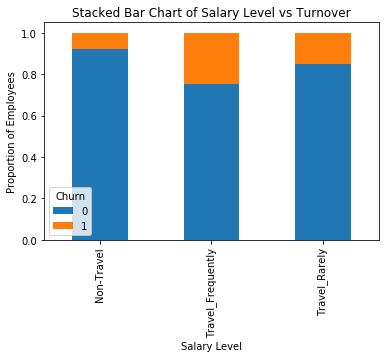

In [144]:
table=pd.crosstab(hr.Viajes_negocios, hr.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

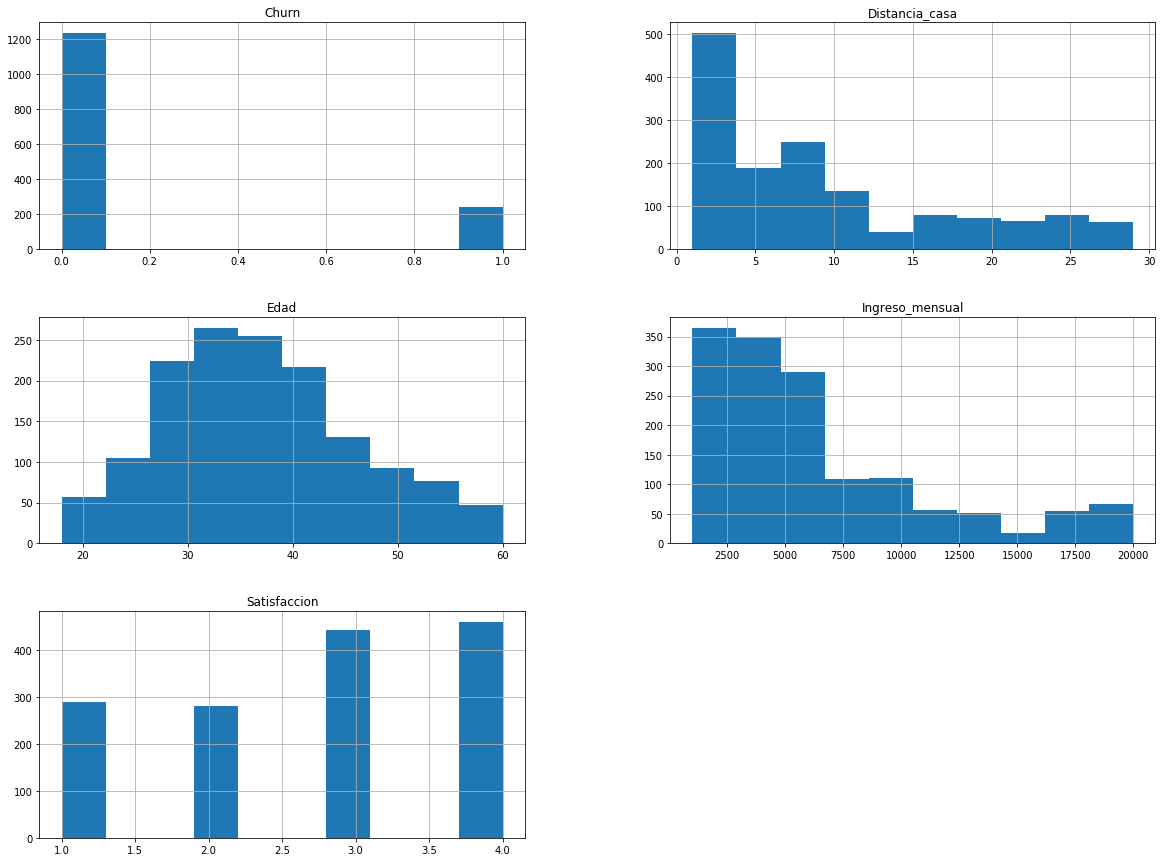

In [145]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [146]:
cat_vars=['Genero','Viajes_negocios','Area','Cargo','Estado_civil']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [147]:
hr.drop(hr.columns[[1,2,4,5,6]], axis=1, inplace=True)
hr.columns.values

array(['Edad', 'Distancia_casa', 'Ingreso_mensual', 'Satisfaccion',
       'Churn', 'Genero_Female', 'Genero_Male',
       'Viajes_negocios_Non-Travel', 'Viajes_negocios_Travel_Frequently',
       'Viajes_negocios_Travel_Rarely', 'Area_Human Resources',
       'Area_Research & Development', 'Area_Sales',
       'Cargo_Healthcare Representative', 'Cargo_Human Resources',
       'Cargo_Laboratory Technician', 'Cargo_Manager',
       'Cargo_Manufacturing Director', 'Cargo_Research Director',
       'Cargo_Research Scientist', 'Cargo_Sales Executive',
       'Cargo_Sales Representative', 'Estado_civil_Divorced',
       'Estado_civil_Married', 'Estado_civil_Single'], dtype=object)

In [148]:

hr_vars=hr.columns.values.tolist()
y='Churn'
X=[i for i in hr_vars if i not in y]



In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True False False False False
  True  True False  True  True  True False False  True  True  True False]
[13 12 15  6  7 14  1  1  8  9  3 10  1  1  2  1  1  1  4 11  1  1  1  5]


In [150]:
cols=['Viajes_negocios_Non-Travel', 'Viajes_negocios_Travel_Frequently', 'Estado_civil_Married', 'Estado_civil_Divorced', 'Cargo_Sales Representative', 
      'Cargo_Research Director', 'Cargo_Manufacturing Director', 'Cargo_Manager', 'Cargo_Human Resources', 'Cargo_Healthcare Representative'] 
X=hr[cols]
y=hr['Churn']




In [151]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.5f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.84580


In [153]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
print('Random Forest Accuracy: {:.5f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.84354


In [155]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.841


In [157]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.841


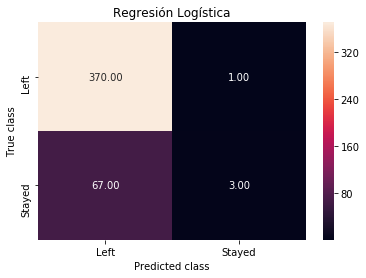

In [158]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
logreg_cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Regresión Logística')
plt.savefig('Regresión Logística')

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       371
          1       0.75      0.04      0.08        70

avg / total       0.83      0.85      0.78       441



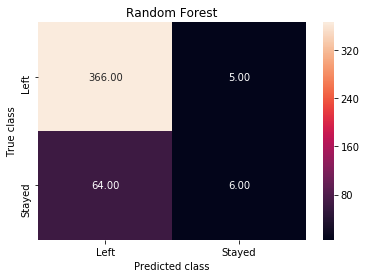

In [160]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91       371
          1       0.55      0.09      0.15        70

avg / total       0.80      0.84      0.79       441



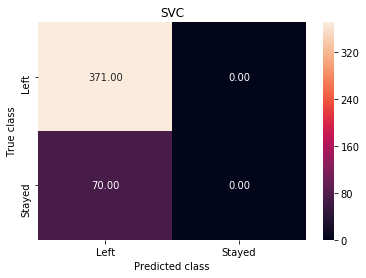

In [162]:
y_pred = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVC')
plt.savefig('random_forest')

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       371
          1       0.00      0.00      0.00        70

avg / total       0.71      0.84      0.77       441



C:\Users\percy\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


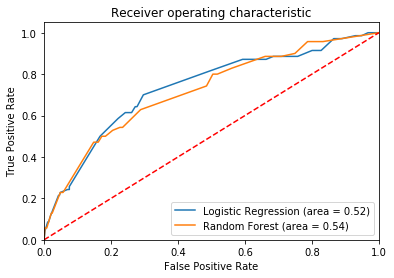

In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize


logit_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [165]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(y_test, logreg.predict(X_test)), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)
    

,Predicted False,Predicted True
Actual False,370,1
Actual True,67,3


,importance,labels
4,0.205898,Cargo_Sales Representative
1,0.155157,Viajes_negocios_Travel_Frequently
2,0.155046,Estado_civil_Married
3,0.105869,Estado_civil_Divorced
0,0.080306,Viajes_negocios_Non-Travel


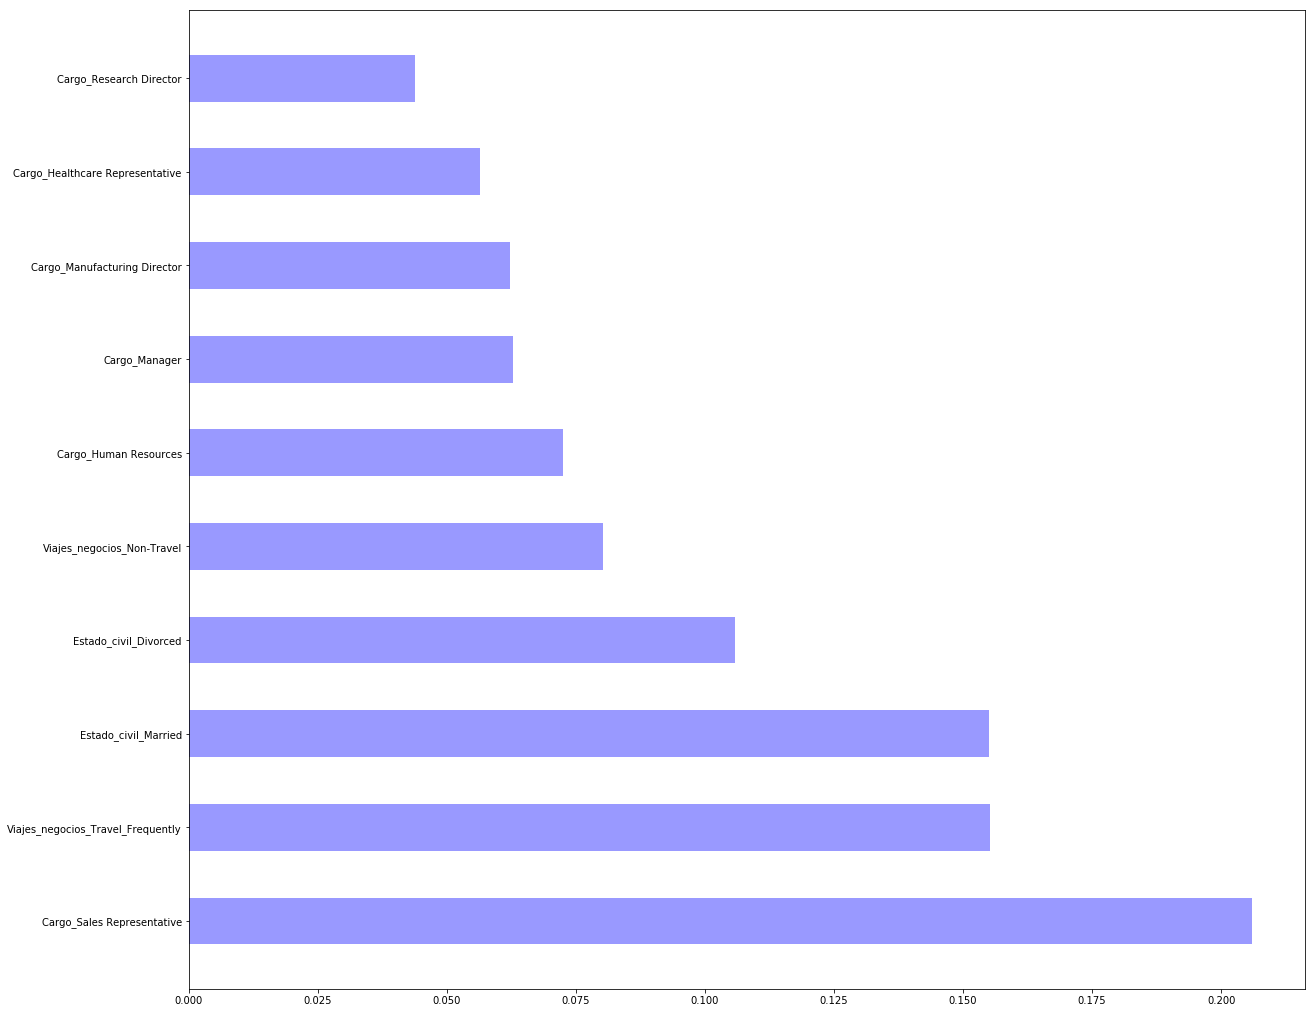

In [168]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(rf.feature_importances_, columns=["importance"])
df_f["labels"] = cols
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(rf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()